# Machine Learning Essentials SS25 - Exercise Sheet 2

## Instructions
- `TODO`'s indicate where you need to complete the implementations.
- You may use external resources, but <b>write your own solutions</b>.
- Provide concise, but comprehensible comments to explain what your code does.
- Code that's unnecessarily extensive and/or not well commented will not be scored.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.stats import multivariate_normal
np.random.seed(42)

## Exercise 1 - Part 2

### Task 2a

In [3]:
muA = np.array([-1.0, -1.0])
muB = np.array([1.0, 1.0])
SigmaA = np.array([[1.0, 0.3],
                  [0.3, 1.0]])
SigmaB = np.array([[1.5, -0.2],
                  [-0.2, 1.5]])

piA, piB = 0.5, 0.5

# Inverses
invA = np.linalg.inv(SigmaA)
invB = np.linalg.inv(SigmaB)

# QDA parameters
Lambda = -0.5 * (invA - invB)
w_qda = invA.dot(muA) - invB.dot(muB)
b_qda = (
    -0.5 * (muA.T.dot(invA).dot(muA) - muB.T.dot(invB).dot(muB))
    -0.5 * np.log(np.linalg.det(SigmaA) / np.linalg.det(SigmaB))
    + np.log(piA / piB)
)

# LDA parameters
Sigma_pooled = 0.5 * (SigmaA + SigmaB)
inv_pooled = np.linalg.inv(Sigma_pooled)
w_lda = inv_pooled.dot(muA - muB)
b_lda = (
    -0.5 * muA.T.dot(inv_pooled).dot(muA) + 0.5 * muB.T.dot(inv_pooled).dot(muB)
    + np.log(piA / piB)
)

print("QDA parameters:")
print("Lambda:\n", Lambda)
print("w_qda:\n", w_qda)
print("b_qda:\n", b_qda)
print("\nLDA parameters:")
print("w_lda:\n", w_lda)
print("b_lda:\n", b_lda)

QDA parameters:
Lambda:
 [[-0.21008403  0.21008403]
 [ 0.21008403 -0.21008403]]
w_qda:
 [-1.53846154 -1.53846154]
b_qda:
 0.44365159750045136

LDA parameters:
w_lda:
 [-1.53846154 -1.53846154]
b_lda:
 0.0


### Task 2b

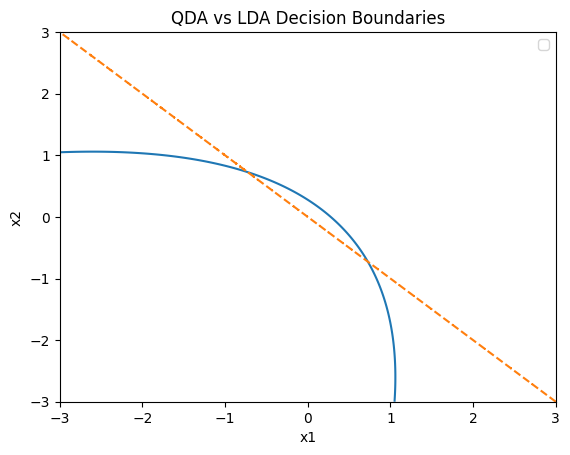

In [4]:
invP = np.linalg.inv(Sigma_pooled)
def g_qda(x):
    return (-0.5*np.log(np.linalg.det(SigmaA))
            -0.5*(x-muA)@invA@(x-muA)
            +np.log(piA)
            ) - (
            -0.5*np.log(np.linalg.det(SigmaB))
            -0.5*(x-muB)@invB@(x-muB)
            +np.log(piB)
            )

def g_lda(x):
    w = invP@(muA-muB)
    b = -0.5*(muA@invP@muA - muB@invP@muB) + np.log(piA/piB)
    return w@x + b

xs = np.linspace(-3,3,400)
ys = np.linspace(-3,3,400)
X, Y = np.meshgrid(xs, ys)
Z_qda = np.array([g_qda([x,y]) for x,y in zip(X.ravel(), Y.ravel())]).reshape(X.shape)
Z_lda = np.array([g_lda([x,y]) for x,y in zip(X.ravel(), Y.ravel())]).reshape(X.shape)

# Plot
plt.contour(X, Y, Z_qda, levels=[0], colors='C0')
plt.contour(X, Y, Z_lda, levels=[0], linestyles='--', colors='C1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['QDA', 'LDA'])
plt.title('QDA vs LDA Decision Boundaries')
plt.show()

## Exercise 2 - Implementing LDA

### Task 1

In [ ]:
# TODO: Load digits dataset, visualize one example image of digit 3

### Task 2

In [ ]:
# TODO: Filter the dataset to keep only digits 3 and 9, split into training and test set (train/test = 3/2)

### Task 3

In [ ]:
def features_2d(x):
    """
    This function takes the 64x1 feature vectors and returns a 2D representation of the data.
    """
    # TODO: Design a 2D embedding of the data
    return features_2d

# TODO: Create an embedded dataset, provide a brief justification for your choice of embedding


### Task 4

In [ ]:
def pca_rep(x):
    """
    This function takes the 64x1 feature vectors and returns a 2D representation of the data. It uses PCA to reduce the dimensionality of the data to 2. PCA is a widely used algorithm for dimensionality reduction. Intuitively, PCA finds the directions in which the data varies the most and projects the data onto these directions.
    """
    # Standardize the data
    pca = PCA(n_components=2)
    return pca.fit_transform(x)

# TODO: Create a PCA-embedded dataset. Visualize & compare the embeddings. Briefly discuss the differences in separation achieved by the embeddings.


### Task 5

In [ ]:
def fit_lda(training_features, training_labels):
    """
    Compute LDA parameters.
    """
    # TODO: Implement LDA

    return mu, covmat, p

# TODO: Fit seperate LDA models using your hand-crafted embedding, the PCA embedding, and the original data.

### Task 6

In [ ]:
def predict_lda(mu, covmat, p, test_features):
    """
    Predict labels using the LDA decision rule.
    """
    # TODO: Implement the LDA decision rule
    
    return predicted_labels

# TODO: Perform LDA on the filtered train sets of all 3 embeddings, evaluate on the respective test set. Report training and test error rates for all 3 embeddings. Error rate = 1 - accuracy.

### Task 7

In [ ]:
# TODO: For your hand-crafted embedding, visualize the decision boundary of the LDA classifier over a scatterplot of your data. Use a grid of points to visualize the decision boundary. Bonus: Visualize both Gaussian isocontours of the LDA model.

### Task 8

In [ ]:
def cross_val_lda(X, y, n_splits):
    """
    Perform n-fold cross-validation for LDA using the earlier defined functions fit_lda and predict_lda."
    """
    # TODO: Implement cross-validation for LDA.
    return avg_error

# TODO: Perform 10-fold CV on the original data. Report average test error rate and its standard error. Compare with the test error rate of the LDA model trained on the full dataset.

# Exercise 3 - Statistical Darts

### Task 1

In [ ]:
def simulate_data(mu_true, Sigma_true, n_samples):
    # TODO: Simulate data from a bivariate Gaussian distribution given the mean and covariance.
    return data

### Task 2

In [ ]:
def compute_mle(data):
    # TODO: Compute the MLE for the mean of a Gaussian distribution.
    return mu_mle

### Task 3

In [ ]:
def compute_posterior(data, prior, Sigma_true):
    # TODO: Compute the parameters of the posterior distribution for the unknown mean mu.
    return mu_post, Sigma_post

def compute_map(data, prior, Sigma_true):
    # TODO: Assign mode of the posterior to mu_map.
    return mu_map

### Task 4

In [ ]:
def visualize_inference(mu_true, mu_mle, mu_map, mu_post, Sigma_post, data,
                        grid_limits=[-1, 1, -1, 1], n_points=100):
    """
    Visualizes the full posterior distribution as Gaussian isocontours over a 2D grid with dartboard-like background,
    alongside the true mean, MLE estimate, MAP estimate and the simulated data points.

    Additional parameters:
        grid_limits: [xmin, xmax, ymin, ymax] limits for the 2D grid.
        n_points: Number of grid points per axis.
    """

    # Define the grid
    xmin, xmax, ymin, ymax = grid_limits
    x = np.linspace(xmin, xmax, n_points)
    y = np.linspace(ymin, ymax, n_points)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))

    # Get the posterior distribution
    rv = multivariate_normal(mu_post, Sigma_post)
    # Evaluate the pdf of the posterior @ the grid points
    Z = rv.pdf(pos)
    
    # Compute some contour levels
    levels = np.linspace(Z.max()*0.05, Z.max()*0.95, 7)

    plt.figure(figsize=(8, 6), facecolor='white')

    # Plot a dartboard-like background (concentric circles)
    center = [0,0]
    radius = 0.8 
    for r in [radius, radius*0.8, radius*0.6, radius*0.4, radius*0.2]:
        circle = plt.Circle(center, r, fill=False, color='black')
        plt.gca().add_artist(circle)
    plt.axis('equal')

    # Add bullseye
    plt.plot(center[0], center[1], 'o', markersize=10, c='red')

    # Plot isocontours of  posterior
    contour = plt.contour(X, Y, Z, levels=levels, cmap='viridis',linewidths=1)

    # Add labels to the isocontours (off by default for visibility)
    # plt.clabel(contour, inline=True, fontsize=8, fmt="%.1f")

    # Plot observed data points
    plt.scatter(data[:, 0], data[:, 1], c='gray', edgecolor='k', alpha=0.6, label='Data')

    # Plot true mean (ground truth)
    plt.scatter(mu_true[0], mu_true[1], c='black', marker='*', s=200, label='True aiming spot')

    # Plot MLE estimate
    plt.scatter(mu_mle[0], mu_mle[1], c='green', marker='x', s=100, label='MLE Estimate')

    # Plot MAP estimate 
    plt.scatter(mu_map[0], mu_map[1], c='blue', marker='x', s=100, label='MAP Estimate')

    plt.title("True Mean, posterior uncertainty, MLE & MAP on the dart board")
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.legend()
    plt.grid(False)

    plt.show()

In [ ]:
# Ground truth parameters for the dart throws:
mu_true = np.array([0, 0.50])
Sigma_true = np.array([[0.05, 0.02],
                       [0.02, 0.04]])

# Prior for mu - standard normal around the bullseye
prior = {
    "mu0": np.array([0, 0]),
    "Sigma0": np.eye(2)
}

# TODO: Simulate data, compute MLE, MAP and posterior

# Visualize the inference
visualize_inference(mu_true, mu_mle, mu_map, mu_post, Sigma_post, data)
print(f"MLE estimate for N={n_samples}:", mu_mle)
print(f"MAP estimate for N={n_samples}:", mu_map)
print(f"Posterior covariance for N={n_samples}:\n", Sigma_post)

# TODO: Assess results (see exercise sheet)